In [1]:
import torch
import numpy as np

print("=" * 60)
print("PYTORCH TENSOR OPERATIONS COMPREHENSIVE TUTORIAL")
print("=" * 60)

PYTORCH TENSOR OPERATIONS COMPREHENSIVE TUTORIAL


In [ ]:
# when multiplying 2 matrices, the number of columns in the first matrix must equal the number of rows in the second matrix
# this is called the inner dimension

# multiplying two matrices is called the dot product
# the size of the resulting matrix is (rows of first matrix, columns of second matrix)
# e.g. if A is shape (2, 3) and B is shape (3, 4), then the result will be shape (2, 4)

# to get the dot product we multiply each row of the first matrix by each column of the second matrix and sum the results


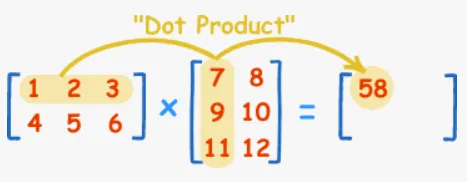

In [2]:
# ============================================================================
# SECTION 1: TENSOR MULTIPLICATION EXAMPLES
# ============================================================================

print("\n" + "=" * 50)
print("1. TENSOR MULTIPLICATION EXAMPLES")
print("=" * 50)

# Basic 2D tensor multiplication (matrix multiplication)
print("\n--- 2D Tensor Multiplication ---")

# the format of the tensors is (rows, columns) compare to opencv which is (columns, rows)
print("PyTorch tensors are in (rows, columns) format, unlike OpenCV which uses (columns, rows).")

# Create 2D tensors
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)  # Shape: (2, 3)

B = torch.tensor([[7, 8],
                  [9, 10],
                  [11, 12]], dtype=torch.float32)  # Shape: (3, 2)

print(f"Tensor A shape: {A.shape}")
print(f"Tensor A:\n{A}")
print(f"\nTensor B shape: {B.shape}")
print(f"Tensor B:\n{B}")

# Matrix multiplication - valid because inner dimensions match (3, 3)
C = torch.matmul(A, B)  # or A @ B
print(f"\nA @ B result shape: {C.shape}")
print(f"A @ B result:\n{C}")

# Element-wise multiplication (requires same shape)
D = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float32)  # Shape: (2, 2)

E = torch.tensor([[5, 6],
                  [7, 8]], dtype=torch.float32)  # Shape: (2, 2)

print(f"\nElement-wise multiplication D * E:")
print(f"D shape: {D.shape}, E shape: {E.shape}")
print(f"Result:\n{D * E}")


1. TENSOR MULTIPLICATION EXAMPLES

--- 2D Tensor Multiplication ---
PyTorch tensors are in (rows, columns) format, unlike OpenCV which uses (columns, rows).
Tensor A shape: torch.Size([2, 3])
Tensor A:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Tensor B shape: torch.Size([3, 2])
Tensor B:
tensor([[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]])

A @ B result shape: torch.Size([2, 2])
A @ B result:
tensor([[ 58.,  64.],
        [139., 154.]])

Element-wise multiplication D * E:
D shape: torch.Size([2, 2]), E shape: torch.Size([2, 2])
Result:
tensor([[ 5., 12.],
        [21., 32.]])


In [ ]:
# ============================================================================
# INVALID MULTIPLICATION EXAMPLES
# ============================================================================

print("\n--- Invalid Multiplication Examples ---")

# Invalid matrix multiplication - inner dimensions don't match
F = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float32)  # Shape: (2, 2)

G = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]], dtype=torch.float32)  # Shape: (3, 3)

print(f"F shape: {F.shape}, G shape: {G.shape}")
try:
    result = torch.matmul(F, G)
    print(f"F @ G succeeded: {result.shape}")
except RuntimeError as e:
    print(f"F @ G failed: {e}")

try:
    result = torch.matmul(G, F)
    print(f"G @ F failed: Expected error")
except RuntimeError as e:
    print(f"G @ F failed: {e}")


--- Invalid Multiplication Examples ---
F shape: torch.Size([2, 2]), G shape: torch.Size([3, 3])
F @ G failed: mat1 and mat2 shapes cannot be multiplied (2x2 and 3x3)
G @ F failed: mat1 and mat2 shapes cannot be multiplied (3x3 and 2x2)


In [11]:
G_T = G.T  # Transpose G
print(f"G.T shape: {G_T.shape}")
print(f"G shape: {G.shape}")
print(f"G:\n{G}")
print(f"G.T:\n{G_T}")

G.T shape: torch.Size([3, 3])
G shape: torch.Size([3, 3])
G:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
G.T:
tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])


In [ ]:
# ============================================================================
# 3D TENSOR MULTIPLICATION EXAMPLES
# ============================================================================

print("\n--- 3D Tensor Multiplication ---")

# Batch matrix multiplication
H = torch.randn(4, 3, 5)  # Batch of 4 matrices, each 3x5
I = torch.randn(4, 5, 2)  # Batch of 4 matrices, each 5x2

print(f"H shape: {H.shape} (batch_size=4, 3x5 matrices)")
print(f"I shape: {I.shape} (batch_size=4, 5x2 matrices)")

# Batch matrix multiplication
J = torch.bmm(H, I)  # or torch.matmul(H, I)
print(f"Batch matmul result shape: {J.shape}")
print(f"Each result matrix is 3x2, with 4 batches")

# Broadcasting in 3D
K = torch.randn(2, 3, 4)  # Shape: (2, 3, 4)
L = torch.randn(4, 5)     # Shape: (4, 5)

print(f"\nK shape: {K.shape}")
print(f"L shape: {L.shape}")

# This works due to broadcasting rules.
M = torch.matmul(K, L)
print(f"K @ L result shape: {M.shape}")
print("Broadcasting applied: (2, 3, 4) @ (4, 5) -> (2, 3, 5)")



--- 3D Tensor Multiplication ---
H shape: torch.Size([4, 3, 5]) (batch_size=4, 3x5 matrices)
I shape: torch.Size([4, 5, 2]) (batch_size=4, 5x2 matrices)
Batch matmul result shape: torch.Size([4, 3, 2])
Each result matrix is 3x2, with 4 batches

K shape: torch.Size([2, 3, 4])
L shape: torch.Size([4, 5])
K @ L result shape: torch.Size([2, 3, 5])
Broadcasting applied: (2, 3, 4) @ (4, 5) -> (2, 3, 5)


In [13]:
# ============================================================================
# MORE COMPLEX 3D EXAMPLES
# ============================================================================

print("\n--- Complex 3D Examples ---")

# Different batch sizes with broadcasting
N = torch.randn(1, 3, 4)  # Single batch
O = torch.randn(5, 4, 2)  # 5 batches

result = torch.matmul(N, O)
print(f"N shape: {N.shape}, O shape: {O.shape}")
print(f"N @ O result shape: {result.shape}")
print("Broadcasting: (1, 3, 4) @ (5, 4, 2) -> (5, 3, 2)")
# Broadcasting in this case means the single batch of N is applied across all 5 batches of O.


--- Complex 3D Examples ---
N shape: torch.Size([1, 3, 4]), O shape: torch.Size([5, 4, 2])
N @ O result shape: torch.Size([5, 3, 2])
Broadcasting: (1, 3, 4) @ (5, 4, 2) -> (5, 3, 2)


In [ ]:
# ============================================================================
# SECTION 2: TENSOR SIZE MANIPULATION
# ============================================================================

print("\n" + "=" * 50)
print("2. TENSOR SIZE MANIPULATION")
print("=" * 50)

# ============================================================================
# .view() EXAMPLES
# ============================================================================

print("\n--- .view() Examples ---")

# Basic reshaping
original = torch.arange(12) # Create a 1D tensor with 12 elements
print(f"Original tensor: {original}")
print(f"Original shape: {original.shape}")

# Reshape to 2D
reshaped_2d = original.view(3, 4) # you can also pass -1 to automatically calculate the dimension
print(f"\nReshaped to (3, 4):\n{reshaped_2d}")

# Reshape to 3D
reshaped_3d = original.view(2, 2, 3)
print(f"\nReshaped to (2, 2, 3):")
for i in range(2):
    print(f"Batch {i}:\n{reshaped_3d[i]}")

# Using -1 for automatic dimension calculation
auto_dim = original.view(-1, 4)  # -1 means "figure out this dimension"
print(f"\nAuto dimension with -1: shape {auto_dim.shape}")
print(f"Result:\n{auto_dim}")

auto_dim2 = original.view(2, -1)
print(f"\nAuto dimension (2, -1): shape {auto_dim2.shape}")
print(f"Result:\n{auto_dim2}")

# Flatten using view
flattened = reshaped_3d.view(-1)
print(f"\nFlattened: {flattened}")
print(f"Flattened shape: {flattened.shape}")


2. TENSOR SIZE MANIPULATION

--- .view() Examples ---
Original tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Original shape: torch.Size([12])

Reshaped to (3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Reshaped to (2, 2, 3):
Batch 0:
tensor([[0, 1, 2],
        [3, 4, 5]])
Batch 1:
tensor([[ 6,  7,  8],
        [ 9, 10, 11]])

Auto dimension with -1: shape torch.Size([3, 4])
Result:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Auto dimension (2, -1): shape torch.Size([2, 6])
Result:
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

Flattened: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Flattened shape: torch.Size([12])


In [ ]:
# ============================================================================
# .squeeze() EXAMPLES
# ============================================================================

print("\n--- .squeeze() Examples ---")

# Create tensor with singleton dimensions. These are dimensions with size 1 and are often used for broadcasting.
tensor_with_ones = torch.randn(1, 3, 1, 4, 1)
print(f"Original tensor shape: {tensor_with_ones.shape}")

# Remove all singleton dimensions
squeezed_all = tensor_with_ones.squeeze()
print(f"Squeezed all: {squeezed_all.shape}")

# Remove specific dimension
squeezed_dim0 = tensor_with_ones.squeeze(0)  # Remove dimension 0 if it's 1
print(f"Squeezed dim 0: {squeezed_dim0.shape}")

squeezed_dim2 = tensor_with_ones.squeeze(2)  # Remove dimension 2 if it's 1
print(f"Squeezed dim 2: {squeezed_dim2.shape}")

# .unsqueeze() - add singleton dimensions
unsqueezed = squeezed_all.unsqueeze(0)  # Add dimension at position 0
print(f"Unsqueezed at dim 0: {unsqueezed.shape}")

unsqueezed_end = squeezed_all.unsqueeze(-1)  # Add dimension at the end
print(f"Unsqueezed at end: {unsqueezed_end.shape}")


--- .squeeze() Examples ---
Original tensor shape: torch.Size([1, 3, 1, 4, 1])
Squeezed all: torch.Size([3, 4])
Squeezed dim 0: torch.Size([3, 1, 4, 1])
Squeezed dim 2: torch.Size([1, 3, 4, 1])
Unsqueezed at dim 0: torch.Size([1, 3, 4])
Unsqueezed at end: torch.Size([3, 4, 1])


In [ ]:
# ============================================================================
# SECTION 3: ARRAY INDEXING WITH : AND -1
# ============================================================================

print("\n" + "=" * 50)
print("3. ARRAY INDEXING WITH : AND -1")
print("=" * 50)

# Create a sample 3D tensor for indexing examples
sample_tensor = torch.arange(24).view(2, 3, 4) # arrange creates a 1D tensor with values from 0 to 23, then we reshape it to (2, 3, 4)
print(f"Sample tensor shape: {sample_tensor.shape}")
print(f"Sample tensor:\n{sample_tensor}")


3. ARRAY INDEXING WITH : AND -1
Sample tensor shape: torch.Size([2, 3, 4])
Sample tensor:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


In [17]:
# ============================================================================
# BASIC INDEXING WITH :
# ============================================================================

print("\n--- Basic Indexing with : ---")

# Select all elements along a dimension
print("All batches, all rows, all columns:")
print(f"sample_tensor[:, :, :] shape: {sample_tensor[:, :, :].shape}")

# First batch, all rows, all columns
print(f"\nFirst batch [0, :, :] shape: {sample_tensor[0, :, :].shape}")
print(f"Result:\n{sample_tensor[0, :, :]}")

# All batches, first row, all columns
print(f"\nAll batches, first row [:, 0, :] shape: {sample_tensor[:, 0, :].shape}")
print(f"Result:\n{sample_tensor[:, 0, :]}")

# All batches, all rows, first column
print(f"\nAll batches, all rows, first column [:, :, 0] shape: {sample_tensor[:, :, 0].shape}")
print(f"Result:\n{sample_tensor[:, :, 0]}")


--- Basic Indexing with : ---
All batches, all rows, all columns:
sample_tensor[:, :, :] shape: torch.Size([2, 3, 4])

First batch [0, :, :] shape: torch.Size([3, 4])
Result:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

All batches, first row [:, 0, :] shape: torch.Size([2, 4])
Result:
tensor([[ 0,  1,  2,  3],
        [12, 13, 14, 15]])

All batches, all rows, first column [:, :, 0] shape: torch.Size([2, 3])
Result:
tensor([[ 0,  4,  8],
        [12, 16, 20]])


In [ ]:
# ============================================================================
# ADVANCED INDEXING WITH :
# ============================================================================

print("\n--- Advanced Indexing with : ---")

# Slicing ranges
print("First 2 elements of each dimension:")
print(f"sample_tensor[:2, :2, :2] shape: {sample_tensor[:2, :2, :2].shape}")
print(f"Result:\n{sample_tensor[:2, :2, :2]}")

# Every other element
print(f"\nEvery other column [:, :, ::2] shape: {sample_tensor[:, :, ::2].shape}")
print(f"Result:\n{sample_tensor[:, :, ::2]}")

# Reverse order
#print(f"\nReversed last dimension [:, :, ::-1] shape: {sample_tensor[:, :, ::-1].shape}") # reverses the last dimension
print("Last few elements of original vs reversed:")
print(f"Original last column: {sample_tensor[0, 0, -3:]}") # last 3 elements of the first column
#print(f"Reversed first column: {sample_tensor[0, 0, :3][::-1]}") # reverses the first 3 elements of the first column


--- Advanced Indexing with : ---
First 2 elements of each dimension:
sample_tensor[:2, :2, :2] shape: torch.Size([2, 2, 2])
Result:
tensor([[[ 0,  1],
         [ 4,  5]],

        [[12, 13],
         [16, 17]]])

Every other column [:, :, ::2] shape: torch.Size([2, 3, 2])
Result:
tensor([[[ 0,  2],
         [ 4,  6],
         [ 8, 10]],

        [[12, 14],
         [16, 18],
         [20, 22]]])
Last few elements of original vs reversed:
Original last column: tensor([1, 2, 3])


In [24]:
# ============================================================================
# USING -1 FOR INDEXING
# ============================================================================

print("\n--- Using -1 for Indexing ---")

# -1 refers to the last element/index
print("Using -1 to access last elements:")
print(f"Last batch: sample_tensor[-1] shape: {sample_tensor[-1].shape}")
print(f"Last batch:\n{sample_tensor[-1]}")

print(f"\nLast row of first batch: {sample_tensor[0, -1]}")
print(f"Last element of tensor: {sample_tensor[-1, -1, -1]}")

# Negative indexing in slices
print(f"\nLast 2 batches: sample_tensor[-2:] shape: {sample_tensor[-2:].shape}")
print(f"Last 2 rows: sample_tensor[:, -2:] shape: {sample_tensor[:, -2:].shape}")



--- Using -1 for Indexing ---
Using -1 to access last elements:
Last batch: sample_tensor[-1] shape: torch.Size([3, 4])
Last batch:
tensor([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])

Last row of first batch: tensor([ 8,  9, 10, 11])
Last element of tensor: 23

Last 2 batches: sample_tensor[-2:] shape: torch.Size([2, 3, 4])
Last 2 rows: sample_tensor[:, -2:] shape: torch.Size([2, 2, 4])


In [25]:
# ============================================================================
# COMBINING : AND -1
# ============================================================================

print("\n--- Combining : and -1 ---")

# Complex indexing combinations
print("Complex indexing examples:")

# All batches, last row, all columns
result1 = sample_tensor[:, -1, :]
print(f"[:, -1, :] - Last row of all batches: {result1.shape}")
print(f"Result:\n{result1}")

# Last batch, all rows, last column
result2 = sample_tensor[-1, :, -1]
print(f"\n[-1, :, -1] - Last column of last batch: {result2.shape}")
print(f"Result: {result2}")

# First batch, last 2 rows, first 2 columns
result3 = sample_tensor[0, -2:, :2]
print(f"\n[0, -2:, :2] - First batch, last 2 rows, first 2 cols: {result3.shape}")
print(f"Result:\n{result3}")


--- Combining : and -1 ---
Complex indexing examples:
[:, -1, :] - Last row of all batches: torch.Size([2, 4])
Result:
tensor([[ 8,  9, 10, 11],
        [20, 21, 22, 23]])

[-1, :, -1] - Last column of last batch: torch.Size([3])
Result: tensor([15, 19, 23])

[0, -2:, :2] - First batch, last 2 rows, first 2 cols: torch.Size([2, 2])
Result:
tensor([[4, 5],
        [8, 9]])


In [26]:
# ============================================================================
# PRACTICAL EXAMPLES
# ============================================================================

print("\n--- Practical Examples ---")

# Example: Working with batch data
batch_data = torch.randn(32, 10, 128)  # 32 samples, 10 time steps, 128 features
print(f"Batch data shape: {batch_data.shape}")

# Get last time step for all samples
last_timestep = batch_data[:, -1, :]
print(f"Last timestep shape: {last_timestep.shape}")

# Get specific feature across all samples and time steps
feature_5 = batch_data[:, :, 5]
print(f"Feature 5 across all samples and time: {feature_5.shape}")

# Reshape for different use cases
# Flatten time and feature dimensions
flattened_features = batch_data.view(32, -1)
print(f"Flattened features shape: {flattened_features.shape}")

# Example: Image data manipulation
image_batch = torch.randn(16, 3, 64, 64)  # 16 images, 3 channels, 64x64
print(f"\nImage batch shape: {image_batch.shape}")

# Get red channel (assuming RGB order)
red_channel = image_batch[:, 0, :, :]
print(f"Red channel shape: {red_channel.shape}")

# Get center crop
center_crop = image_batch[:, :, 16:48, 16:48]
print(f"Center crop (32x32) shape: {center_crop.shape}")

# Flatten spatial dimensions
flattened_images = image_batch.view(16, 3, -1)
print(f"Flattened spatial dims: {flattened_images.shape}")

print("\n" + "=" * 60)
print("TUTORIAL COMPLETE!")
print("=" * 60)


--- Practical Examples ---
Batch data shape: torch.Size([32, 10, 128])
Last timestep shape: torch.Size([32, 128])
Feature 5 across all samples and time: torch.Size([32, 10])
Flattened features shape: torch.Size([32, 1280])

Image batch shape: torch.Size([16, 3, 64, 64])
Red channel shape: torch.Size([16, 64, 64])
Center crop (32x32) shape: torch.Size([16, 3, 32, 32])
Flattened spatial dims: torch.Size([16, 3, 4096])

TUTORIAL COMPLETE!
